# <center> **ITESO** </center>
# <center> **Final Project Procesamiento de Datos Masivos** </center>
---
## <center> **Machine Learning Applications** </center>
## <center> **Real-Time Stock Price Analysis** </center>
---
## <center> **Par de Foraneos** </center>
---
#### <center> **Spring 2025** </center>
---
#### <center> **05/14/2025** </center>

---
**Profesor**: Dr. Pablo Camarillo Ramirez
**Students**: Eddie, Konrad, Diego, Aaron

## Introduction

In this notebook, we'll apply machine learning to our processed stock price data. Having already set up the data streaming, collection, and preprocessing pipelines, we now focus on applying ML techniques to predict trading signals and evaluate trading strategies using backtesting.

Our approach will be to:
1. Either use our processed parquet files or download historical data
2. Prepare the data with technical indicators and lag features
3. Generate trading signals (BUY/SELL/WAIT) based on future price movements
4. Train SVM models to predict these signals
5. Optimize parameters using Optuna
6. Backtest the trading strategy and evaluate performance

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from par_de_foraneos.stock_utils import load_and_prepare_data, generate_signals, \
                                        StockModel, Model, Backtest

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Source Selection

We can either use the parquet files generated by our streaming pipeline or download historical data directly from Yahoo Finance.

In [2]:
# Define the tickers we're working with
STOCKS = ['CAT', 'AAPL', 'NVDA', 'CVX']

# Choose data source: 'parquet' or 'historical'
data_source = "historical"

## Process Each Stock

Now we'll process each stock in our list using the StockModel class imported from stock_utils.py.

In [3]:
# Set to True to optimize parameters, False to use default parameters
optimize = True

# Process each stock
stock_models = {}
backtest_results = {}

for ticker in STOCKS:
    print(f"\nProcessing {ticker}...")
    
    # Initialize stock model
    stock_model = StockModel(ticker, data_source=data_source, lookback_period_days=59)
    
    # Prepare data
    success = stock_model.prepare_data()
    if not success:
        print(f"Skipping {ticker} due to data preparation failure")
        continue
    
    # Optimize indicators if requested
    if optimize:
        print(f"Optimizing indicators for {ticker}...")
        stock_model.optimize_indicators(n_trials=20)
    
    # Train model
    print(f"Training model for {ticker}...")
    stock_model.train_model()
    
    # Optimize backtest parameters if requested
    if optimize:
        print(f"Optimizing backtest parameters for {ticker}...")
        stock_model.optimize_backtest(n_trials=20)
    
    # Run backtest
    print(f"Running backtest for {ticker}...")
    backtest_results[ticker] = stock_model.run_backtest()
    
    # Store model
    stock_models[ticker] = stock_model


Processing CAT...
YF.download() has changed argument auto_adjust default to True


[I 2025-05-14 22:26:00,030] A new study created in memory with name: no-name-f44ae042-7a78-4cb3-ab43-235bb2996f08


Downloaded data shape: (3197, 5)
Final prepared data shape: (3168, 17)
Optimizing indicators for CAT...


[I 2025-05-14 22:26:00,242] Trial 0 finished with value: 0.9283050460461222 and parameters: {'rsi_window': 15, 'ultimate_window1': 10, 'ultimate_window2': 15, 'ultimate_window3': 28, 'williams_lbp': 20, 'C': 5.521332911630683}. Best is trial 0 with value: 0.9283050460461222.
[I 2025-05-14 22:26:00,354] Trial 1 finished with value: 0.9283053295826047 and parameters: {'rsi_window': 6, 'ultimate_window1': 5, 'ultimate_window2': 18, 'ultimate_window3': 26, 'williams_lbp': 12, 'C': 68.39838020122458}. Best is trial 1 with value: 0.9283053295826047.
[I 2025-05-14 22:26:00,521] Trial 2 finished with value: 0.9283058948486458 and parameters: {'rsi_window': 9, 'ultimate_window1': 3, 'ultimate_window2': 20, 'ultimate_window3': 21, 'williams_lbp': 10, 'C': 0.06774750897429384}. Best is trial 2 with value: 0.9283058948486458.
[I 2025-05-14 22:26:00,588] Trial 3 finished with value: 0.8744686503719448 and parameters: {'rsi_window': 11, 'ultimate_window1': 6, 'ultimate_window2': 13, 'ultimate_window

Best parameters: {'rsi_window': 9, 'ultimate_window1': 3, 'ultimate_window2': 20, 'ultimate_window3': 21, 'williams_lbp': 10, 'C': 0.06774750897429384}
Best F1 score: 0.9283058948486458
Training model for CAT...
F1 Score for CAT: 0.9283058948486458
Optimizing backtest parameters for CAT...


[I 2025-05-14 22:26:04,323] Trial 0 finished with value: 458.020876845358 and parameters: {'stop_loss': 0.025110721331635496, 'take_profit': 0.23245999054226504, 'n_shares': 2700}. Best is trial 0 with value: 458.020876845358.
[I 2025-05-14 22:26:04,448] Trial 1 finished with value: 0.0 and parameters: {'stop_loss': 0.021910729102879, 'take_profit': 0.012717850048187509, 'n_shares': 4800}. Best is trial 0 with value: 458.020876845358.
[I 2025-05-14 22:26:04,591] Trial 2 finished with value: 119.4301790155228 and parameters: {'stop_loss': 0.17829257911590884, 'take_profit': 0.16354030184735854, 'n_shares': 100}. Best is trial 0 with value: 458.020876845358.
[I 2025-05-14 22:26:04,700] Trial 3 finished with value: 433.1893749871326 and parameters: {'stop_loss': 0.04677750153338655, 'take_profit': 0.29440848198696346, 'n_shares': 2600}. Best is trial 0 with value: 458.020876845358.
[I 2025-05-14 22:26:04,811] Trial 4 finished with value: 265.4126821623107 and parameters: {'stop_loss': 0.0

Best backtest parameters: {'stop_loss': 0.010407003182671, 'take_profit': 0.017618143416249413, 'n_shares': 2100}
Best Calmar ratio: 1346.9293347564576
Running backtest for CAT...

Backtest results for CAT:
Calmar ratio: 1346.9293
Sharpe ratio: 7.1890
Sortino ratio: 112.9567
Initial portfolio value: $1,000,000.00
Final portfolio value: $1,038,324.22
Return: 3.83%

Processing AAPL...


[I 2025-05-14 22:26:09,180] A new study created in memory with name: no-name-228e92ad-3042-4dc8-bf22-79bd1ef0f686
[I 2025-05-14 22:26:09,297] Trial 0 finished with value: 0.6664896441848115 and parameters: {'rsi_window': 16, 'ultimate_window1': 3, 'ultimate_window2': 10, 'ultimate_window3': 25, 'williams_lbp': 15, 'C': 4.754505565467828}. Best is trial 0 with value: 0.6664896441848115.


Downloaded data shape: (3196, 5)
Final prepared data shape: (3167, 17)
Optimizing indicators for AAPL...


[I 2025-05-14 22:26:09,823] Trial 1 finished with value: 1.0 and parameters: {'rsi_window': 10, 'ultimate_window1': 10, 'ultimate_window2': 19, 'ultimate_window3': 21, 'williams_lbp': 14, 'C': 0.02911976976095171}. Best is trial 1 with value: 1.0.
[I 2025-05-14 22:26:09,915] Trial 2 finished with value: 0.6664894559631401 and parameters: {'rsi_window': 17, 'ultimate_window1': 1, 'ultimate_window2': 18, 'ultimate_window3': 29, 'williams_lbp': 19, 'C': 5.592172366278318}. Best is trial 1 with value: 1.0.
[I 2025-05-14 22:26:10,020] Trial 3 finished with value: 0.6664898320070733 and parameters: {'rsi_window': 16, 'ultimate_window1': 5, 'ultimate_window2': 19, 'ultimate_window3': 21, 'williams_lbp': 10, 'C': 24.632991228376625}. Best is trial 1 with value: 1.0.
[I 2025-05-14 22:26:10,127] Trial 4 finished with value: 0.6664898320070733 and parameters: {'rsi_window': 14, 'ultimate_window1': 6, 'ultimate_window2': 10, 'ultimate_window3': 23, 'williams_lbp': 14, 'C': 1.0044224229332477}. Bes

Best parameters: {'rsi_window': 10, 'ultimate_window1': 10, 'ultimate_window2': 19, 'ultimate_window3': 21, 'williams_lbp': 14, 'C': 0.02911976976095171}
Best F1 score: 1.0
Training model for AAPL...


[I 2025-05-14 22:26:14,806] A new study created in memory with name: no-name-21e27e38-880f-4fb7-b32f-da731ede0112


F1 Score for AAPL: 1.0
Optimizing backtest parameters for AAPL...


[I 2025-05-14 22:26:15,036] Trial 0 finished with value: 2697.711573882108 and parameters: {'stop_loss': 0.019664766506563743, 'take_profit': 0.02309865819286737, 'n_shares': 3000}. Best is trial 0 with value: 2697.711573882108.
[I 2025-05-14 22:26:15,651] Trial 1 finished with value: 827.1438508656114 and parameters: {'stop_loss': 0.1925156745035585, 'take_profit': 0.08798521379797442, 'n_shares': 3800}. Best is trial 0 with value: 2697.711573882108.
[I 2025-05-14 22:26:15,971] Trial 2 finished with value: -0.5351842184422886 and parameters: {'stop_loss': 0.19938739114241233, 'take_profit': 0.1856192795639703, 'n_shares': 3700}. Best is trial 0 with value: 2697.711573882108.
[I 2025-05-14 22:26:16,186] Trial 3 finished with value: -0.5295907759008177 and parameters: {'stop_loss': 0.15928982805519698, 'take_profit': 0.230828681683492, 'n_shares': 2900}. Best is trial 0 with value: 2697.711573882108.
[I 2025-05-14 22:26:16,369] Trial 4 finished with value: -0.5309936616753081 and parame

Best backtest parameters: {'stop_loss': 0.019664766506563743, 'take_profit': 0.02309865819286737, 'n_shares': 3000}
Best Calmar ratio: 2697.711573882108
Running backtest for AAPL...

Backtest results for AAPL:
Calmar ratio: 2697.7116
Sharpe ratio: 6.0604
Sortino ratio: 228.6667
Initial portfolio value: $1,000,000.00
Final portfolio value: $1,056,763.07
Return: 5.68%

Processing NVDA...


[I 2025-05-14 22:26:19,590] A new study created in memory with name: no-name-0bdefe9f-21d4-4052-9061-259fe11a3410
[I 2025-05-14 22:26:19,650] Trial 0 finished with value: 1.0 and parameters: {'rsi_window': 15, 'ultimate_window1': 10, 'ultimate_window2': 12, 'ultimate_window3': 30, 'williams_lbp': 17, 'C': 4.025394881901534}. Best is trial 0 with value: 1.0.


Downloaded data shape: (3196, 5)
Final prepared data shape: (3167, 17)
Optimizing indicators for NVDA...


[I 2025-05-14 22:26:19,768] Trial 1 finished with value: 1.0 and parameters: {'rsi_window': 20, 'ultimate_window1': 6, 'ultimate_window2': 19, 'ultimate_window3': 29, 'williams_lbp': 20, 'C': 0.39766378206639086}. Best is trial 0 with value: 1.0.
[I 2025-05-14 22:26:19,865] Trial 2 finished with value: 1.0 and parameters: {'rsi_window': 18, 'ultimate_window1': 1, 'ultimate_window2': 12, 'ultimate_window3': 25, 'williams_lbp': 16, 'C': 6.1998018603419975}. Best is trial 0 with value: 1.0.
[I 2025-05-14 22:26:20,082] Trial 3 finished with value: 1.0 and parameters: {'rsi_window': 5, 'ultimate_window1': 10, 'ultimate_window2': 14, 'ultimate_window3': 20, 'williams_lbp': 10, 'C': 0.13179118367335393}. Best is trial 0 with value: 1.0.
[I 2025-05-14 22:26:20,318] Trial 4 finished with value: 0.9522027945330992 and parameters: {'rsi_window': 12, 'ultimate_window1': 1, 'ultimate_window2': 18, 'ultimate_window3': 21, 'williams_lbp': 14, 'C': 0.05278058197174899}. Best is trial 0 with value: 1.0

Best parameters: {'rsi_window': 15, 'ultimate_window1': 10, 'ultimate_window2': 12, 'ultimate_window3': 30, 'williams_lbp': 17, 'C': 4.025394881901534}
Best F1 score: 1.0
Training model for NVDA...
F1 Score for NVDA: 1.0
Optimizing backtest parameters for NVDA...


[I 2025-05-14 22:26:24,620] Trial 0 finished with value: 12.21855189176403 and parameters: {'stop_loss': 0.052977912659339564, 'take_profit': 0.16896240259060982, 'n_shares': 600}. Best is trial 0 with value: 12.21855189176403.
[I 2025-05-14 22:26:24,847] Trial 1 finished with value: 67.3954806532588 and parameters: {'stop_loss': 0.01794129821096826, 'take_profit': 0.07010252499394604, 'n_shares': 4800}. Best is trial 1 with value: 67.3954806532588.
[I 2025-05-14 22:26:25,461] Trial 2 finished with value: -13.196622366259959 and parameters: {'stop_loss': 0.11768403836451492, 'take_profit': 0.20219963219680007, 'n_shares': 800}. Best is trial 1 with value: 67.3954806532588.
[I 2025-05-14 22:26:26,034] Trial 3 finished with value: 3.426984211218233 and parameters: {'stop_loss': 0.05570784626148537, 'take_profit': 0.07262999886405927, 'n_shares': 4800}. Best is trial 1 with value: 67.3954806532588.
[I 2025-05-14 22:26:26,210] Trial 4 finished with value: 278.9998600907707 and parameters: 

Best backtest parameters: {'stop_loss': 0.010365281462291862, 'take_profit': 0.015096572562569388, 'n_shares': 4100}
Best Calmar ratio: 11580.896418489498
Running backtest for NVDA...

Backtest results for NVDA:
Calmar ratio: 11580.8964
Sharpe ratio: 11.6321
Sortino ratio: 279.8406
Initial portfolio value: $1,000,000.00
Final portfolio value: $1,102,730.17
Return: 10.27%

Processing CVX...


[I 2025-05-14 22:26:29,647] A new study created in memory with name: no-name-b1529b3a-72e3-4740-aa21-2b19f9d30ef7
[I 2025-05-14 22:26:29,746] Trial 0 finished with value: 0.49946893255443436 and parameters: {'rsi_window': 8, 'ultimate_window1': 10, 'ultimate_window2': 17, 'ultimate_window3': 24, 'williams_lbp': 13, 'C': 1.3383390242473616}. Best is trial 0 with value: 0.49946893255443436.


Downloaded data shape: (3197, 5)
Final prepared data shape: (3168, 17)
Optimizing indicators for CVX...


[I 2025-05-14 22:26:29,866] Trial 1 finished with value: 0.5552013224701854 and parameters: {'rsi_window': 14, 'ultimate_window1': 1, 'ultimate_window2': 20, 'ultimate_window3': 26, 'williams_lbp': 10, 'C': 7.227089956603064}. Best is trial 1 with value: 0.5552013224701854.
[I 2025-05-14 22:26:29,973] Trial 2 finished with value: 0.6664900194311959 and parameters: {'rsi_window': 9, 'ultimate_window1': 2, 'ultimate_window2': 14, 'ultimate_window3': 20, 'williams_lbp': 17, 'C': 15.111502100309458}. Best is trial 2 with value: 0.6664900194311959.
[I 2025-05-14 22:26:30,283] Trial 3 finished with value: 0.7770693116070374 and parameters: {'rsi_window': 12, 'ultimate_window1': 1, 'ultimate_window2': 17, 'ultimate_window3': 21, 'williams_lbp': 19, 'C': 0.032597129313168806}. Best is trial 3 with value: 0.7770693116070374.
[I 2025-05-14 22:26:30,419] Trial 4 finished with value: 0.49946780202235236 and parameters: {'rsi_window': 10, 'ultimate_window1': 3, 'ultimate_window2': 18, 'ultimate_win

Best parameters: {'rsi_window': 12, 'ultimate_window1': 1, 'ultimate_window2': 17, 'ultimate_window3': 21, 'williams_lbp': 19, 'C': 0.032597129313168806}
Best F1 score: 0.7770693116070374
Training model for CVX...


[I 2025-05-14 22:26:34,212] A new study created in memory with name: no-name-5ee186e5-619b-4b23-8993-95a6b8308688


F1 Score for CVX: 0.7770693116070374
Optimizing backtest parameters for CVX...


[I 2025-05-14 22:26:34,575] Trial 0 finished with value: -7.50197055565922 and parameters: {'stop_loss': 0.13537311828349477, 'take_profit': 0.057169119983557073, 'n_shares': 1800}. Best is trial 0 with value: -7.50197055565922.
[I 2025-05-14 22:26:34,792] Trial 1 finished with value: -7.823429603566811 and parameters: {'stop_loss': 0.0922023970758172, 'take_profit': 0.0866114466855619, 'n_shares': 300}. Best is trial 0 with value: -7.50197055565922.
[I 2025-05-14 22:26:35,025] Trial 2 finished with value: -7.607113786638957 and parameters: {'stop_loss': 0.1463514301414785, 'take_profit': 0.26839665479502267, 'n_shares': 1300}. Best is trial 0 with value: -7.50197055565922.
[I 2025-05-14 22:26:35,696] Trial 3 finished with value: -7.023874211754438 and parameters: {'stop_loss': 0.1666242306339233, 'take_profit': 0.29206111065859847, 'n_shares': 4200}. Best is trial 3 with value: -7.023874211754438.
[I 2025-05-14 22:26:36,376] Trial 4 finished with value: -7.2975195617096045 and paramet

Best backtest parameters: {'stop_loss': 0.1991070116505875, 'take_profit': 0.01671045296287153, 'n_shares': 4800}
Best Calmar ratio: 179.0184434607333
Running backtest for CVX...

Backtest results for CVX:
Calmar ratio: 179.0184
Sharpe ratio: 7.6710
Sortino ratio: 20.1087
Initial portfolio value: $1,000,000.00
Final portfolio value: $1,057,312.87
Return: 5.73%


## Portfolio Performance Analysis

Now we'll analyze the performance of our portfolio, considering it as an equally-weighted portfolio of all the stocks.

In [7]:
# Calculate portfolio metrics
if len(backtest_results) > 0:
    # Calculate average metrics
    avg_calmar = sum(res['calmar'] for res in backtest_results.values()) / len(backtest_results)
    avg_sharpe = sum(res['sharpe'] for res in backtest_results.values()) / len(backtest_results)
    avg_sortino = sum(res['sortino'] for res in backtest_results.values()) / len(backtest_results)
    avg_return = sum(res['return'] for res in backtest_results.values()) / len(backtest_results)
    
    # Calculate total portfolio value over time (equal weighting)
    min_length = min(len(res['portfolio_value']) for res in backtest_results.values())
    portfolio_values = np.zeros(min_length)
    
    for ticker, res in backtest_results.items():
        # Normalize to percentage of initial investment
        normalized_values = np.array(res['portfolio_value'][:min_length]) / res['portfolio_value'][0]
        portfolio_values += normalized_values / len(backtest_results)
    
    # Scale back to dollars - this is the corrected part
    initial_investment = 1_000_000  # $1M total
    portfolio_values = portfolio_values * initial_investment  # Apply to full amount, not per-stock
    
    print("\n==== Portfolio Performance Summary ====\n")
    print(f"Number of stocks: {len(backtest_results)}")
    print(f"Average Calmar Ratio: {avg_calmar:.4f}")
    print(f"Average Sharpe Ratio: {avg_sharpe:.4f}")
    print(f"Average Sortino Ratio: {avg_sortino:.4f}")
    print(f"Average Return: {avg_return:.2f}%")
    print(f"Initial Portfolio Value: ${initial_investment:,.2f}")
    print(f"Final Portfolio Value: ${portfolio_values[-1]:,.2f}")
    print(f"Total Return: {((portfolio_values[-1]/portfolio_values[0])-1)*100:.2f}%")
else:
    print("No backtest results available for portfolio analysis.")


==== Portfolio Performance Summary ====

Number of stocks: 4
Average Calmar Ratio: 3951.1389
Average Sharpe Ratio: 8.1381
Average Sortino Ratio: 160.3932
Average Return: 6.38%
Initial Portfolio Value: $1,000,000.00
Final Portfolio Value: $1,063,782.58
Total Return: 6.38%


## Visualization

Let's visualize the portfolio performance and each stock's performance.

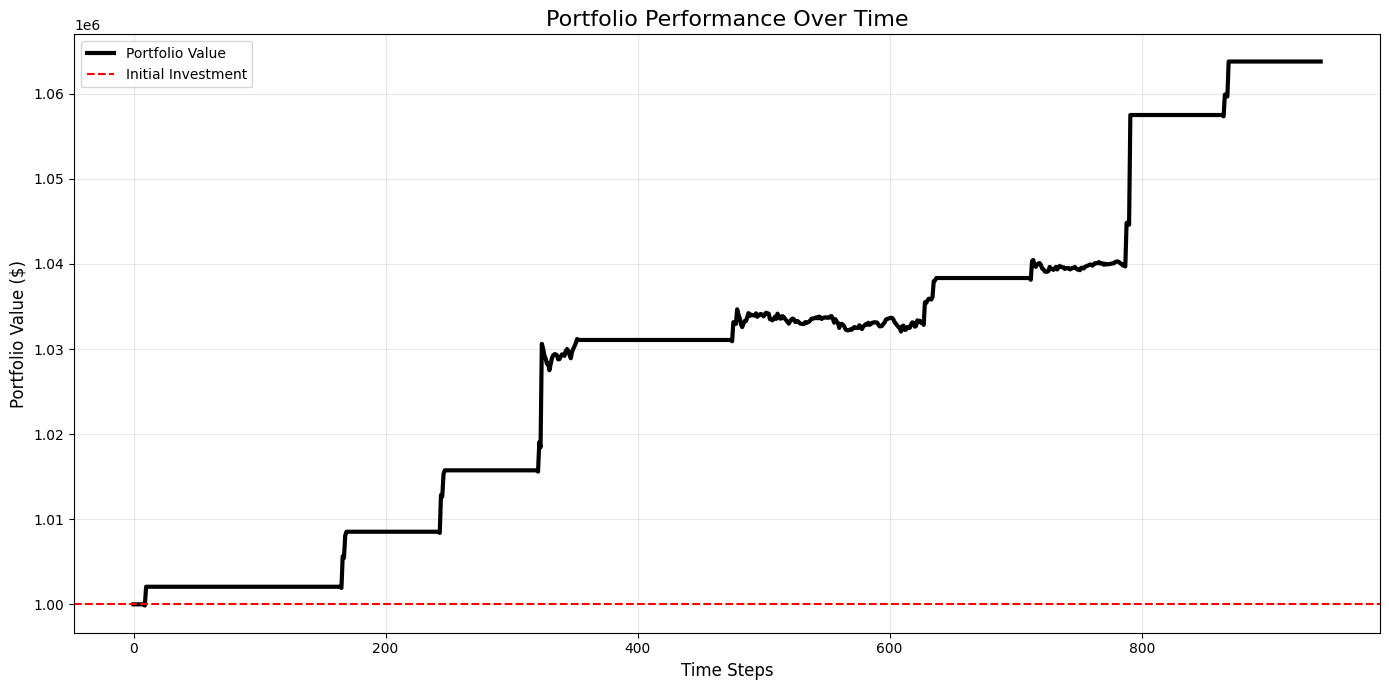

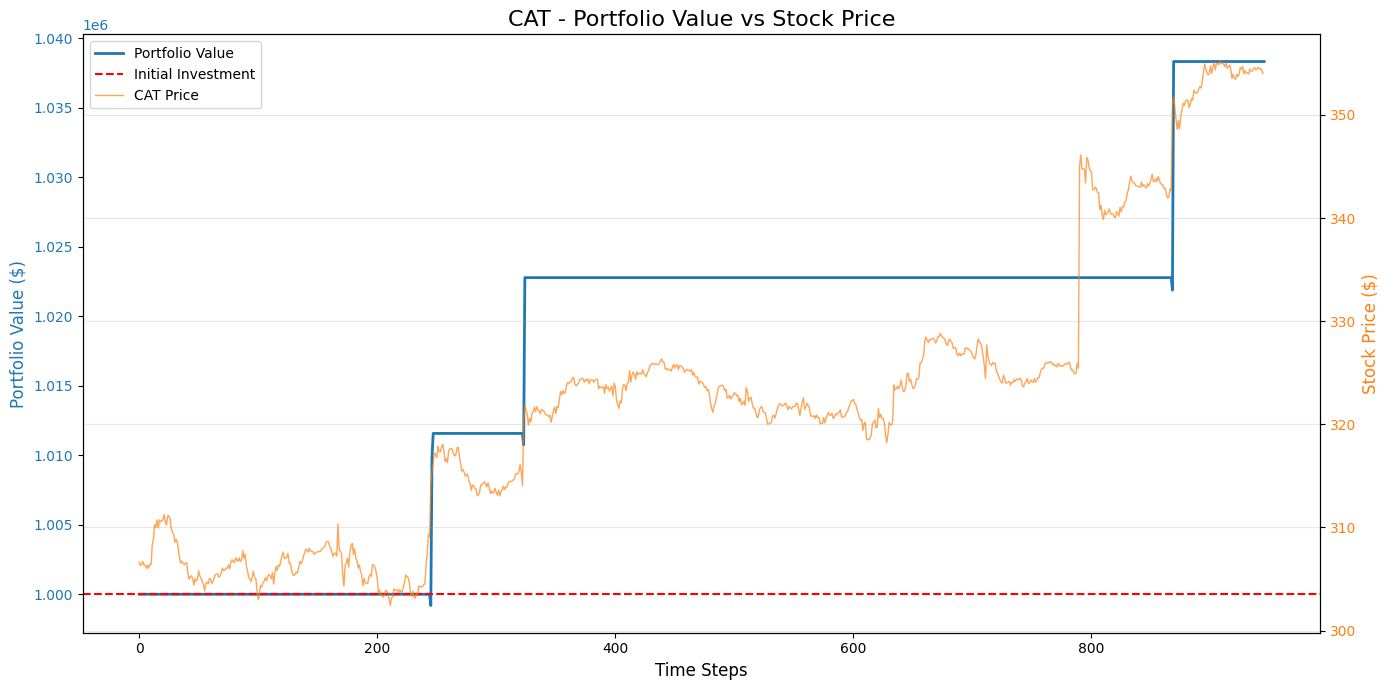

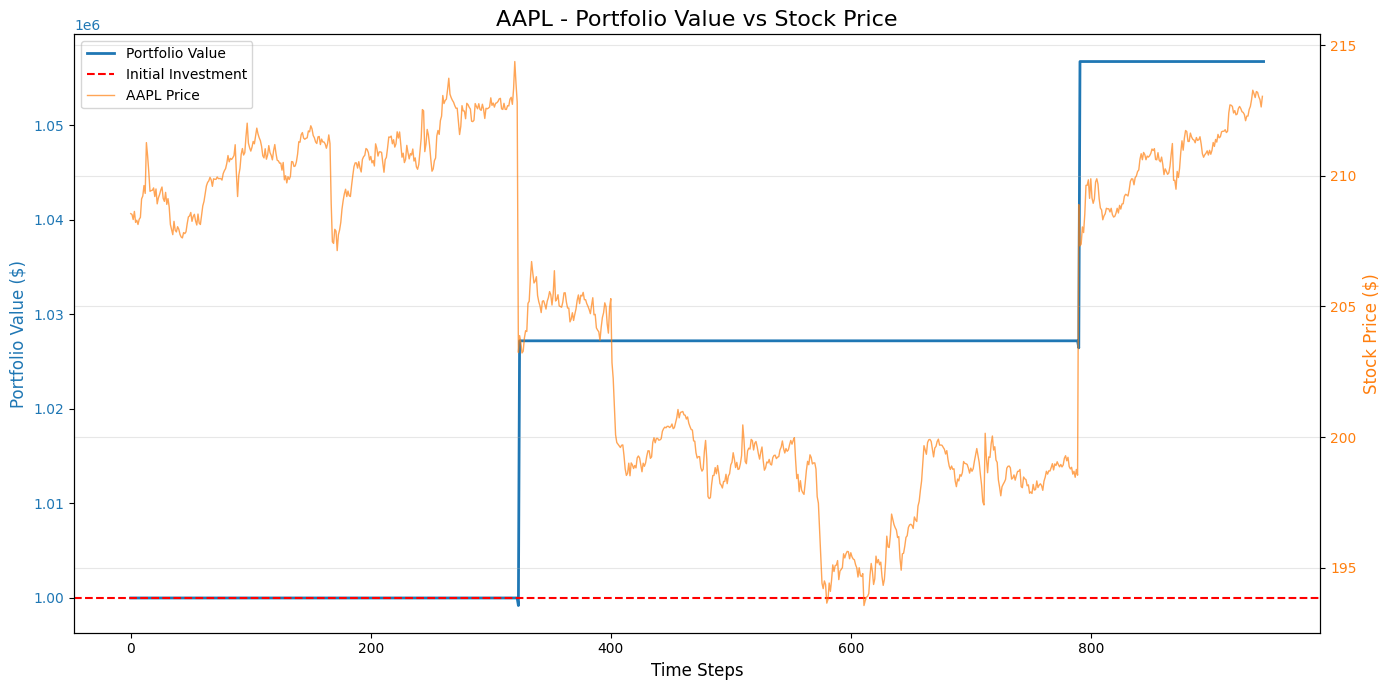

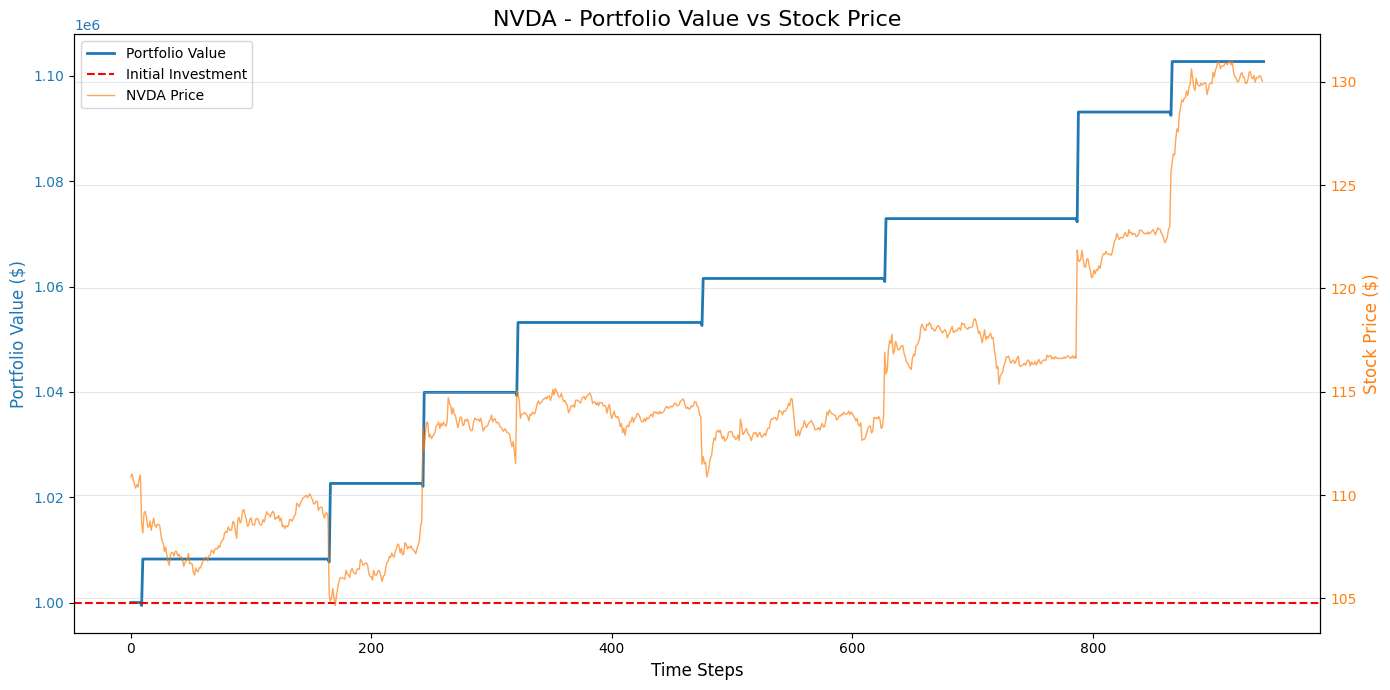

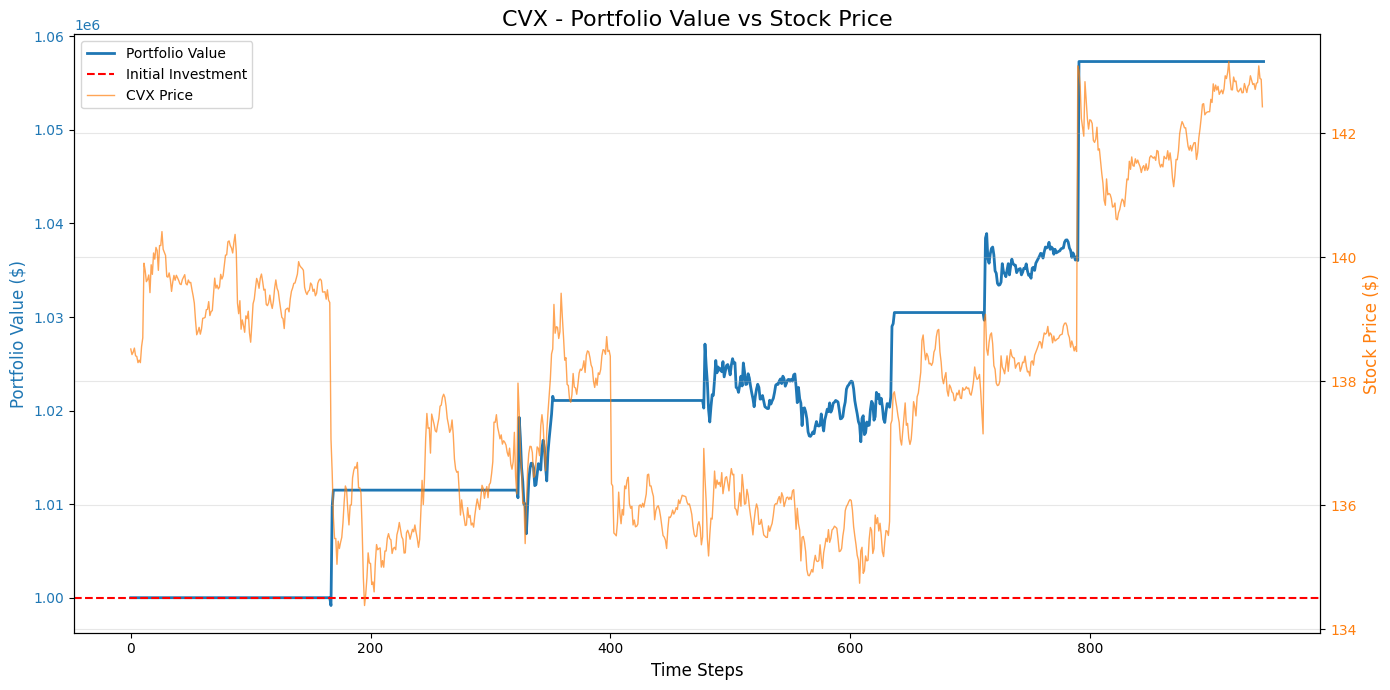

In [8]:
# Create portfolio value visualization
if len(backtest_results) > 0:
    plt.figure(figsize=(14, 7))
    
    # Plot portfolio value
    plt.plot(portfolio_values, label='Portfolio Value', linewidth=3, color='black')
    
    # Initial investment line
    plt.axhline(y=initial_investment, color='r', linestyle='--', label='Initial Investment')
    
    plt.title('Portfolio Performance Over Time', fontsize=16)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Portfolio Value ($)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Individual stock performance
    for ticker, res in backtest_results.items():
        # Create figure with two y-axes
        fig, ax1 = plt.subplots(figsize=(14, 7))
        
        # Plot portfolio value on left axis
        color = 'tab:blue'
        ax1.set_xlabel('Time Steps', fontsize=12)
        ax1.set_ylabel('Portfolio Value ($)', color=color, fontsize=12)
        ax1.plot(res['portfolio_value'], color=color, linewidth=2, label='Portfolio Value')
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.axhline(y=res['initial_value'], color='r', linestyle='--', label='Initial Investment')
        
        # Create second y-axis for stock price
        ax2 = ax1.twinx()
        color = 'tab:orange'
        ax2.set_ylabel('Stock Price ($)', color=color, fontsize=12)
        ax2.plot(res['close_prices'], color=color, linewidth=1, alpha=0.7, label=f'{ticker} Price')
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Title and legend
        plt.title(f'{ticker} - Portfolio Value vs Stock Price', fontsize=16)
        
        # Combined legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No backtest results available for visualization.")

## Export csv to use in Power BI 


In [26]:
# Export portfolio data to CSV for Power BI visualization
import pandas as pd
import numpy as np
import os

if len(backtest_results) > 0:
    # Find minimum length across all portfolio values and close prices
    min_portfolio_length = min(len(res['portfolio_value']) for res in backtest_results.values())
    min_prices_length = min(len(res['close_prices']) for res in backtest_results.values())
    min_length = min(min_portfolio_length, min_prices_length)
    
    # Initialize lists to store data in long format
    timestamps = []
    portfolio_values = []
    stock_prices = []
    identifiers = []  # Will contain ticker names or "Total Portfolio"
    
    # Calculate total portfolio value (equal weighting)
    total_portfolio = np.zeros(min_length)
    initial_investment = 1_000_000
    
    # Process each stock
    for ticker, res in backtest_results.items():
        # Make sure we don't exceed the length of any arrays
        close_prices = res['close_prices'][:min_length]
        portfolio_vals = res['portfolio_value'][:min_length]
        
        # Add to total portfolio (normalized)
        normalized_values = np.array(portfolio_vals) / portfolio_vals[0]
        total_portfolio += normalized_values / len(backtest_results)
        
        # Add data for this stock
        for i in range(min_length):
            timestamps.append(i)
            portfolio_values.append(portfolio_vals[i])
            stock_prices.append(close_prices[i])
            identifiers.append(ticker)
    
    # Scale total portfolio back to dollars
    total_portfolio = total_portfolio * initial_investment
    
    # Add total portfolio data
    for i in range(min_length):
        timestamps.append(i)
        portfolio_values.append(total_portfolio[i])
        stock_prices.append(None)  # No stock price for total portfolio
        identifiers.append("Total Portfolio")
    
    # Create the long-format DataFrame
    export_data = pd.DataFrame({
        'Timestamp': timestamps,
        'Identifier': identifiers,
        'Portfolio_Value': portfolio_values,
        'Stock_Price': stock_prices
    })
    
    # Export to CSV using the correct notebook path
    export_path = "/home/jovyan/notebooks/data/portfolio_results.csv"
    
    # Make sure directory exists
    os.makedirs(os.path.dirname(export_path), exist_ok=True)
    
    export_data.to_csv(export_path, index=False)
    print(f"Portfolio data exported to {export_path}")
else:
    print("No backtest results available for export.")

Portfolio data exported to /home/jovyan/notebooks/data/portfolio_results.csv


## Conclusion